In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['test.csv', 'jokes.csv', 'train.csv', 'sample_submission_5ms57N3.csv']


In [10]:
train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")

In [5]:
sample=pd.read_csv("../input/sample_submission_5ms57N3.csv")
sample.head(10)

,id,Rating
0,6194_11,0
1,19356_3,0
2,23426_79,0
3,40030_3,0
4,19806_115,0
5,10487_45,0
6,19959_8,0
7,10979_66,0
8,34886_6,0
9,4729_103,0


In [9]:

joke_df=pd.read_csv('../input/jokes.csv')
joke_df.shape

(139, 2)

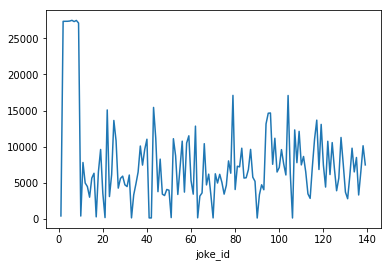

In [11]:
group=train.groupby('joke_id').size()
group.plot()

In [12]:
group_test=test.groupby('joke_id').size()
group_test.values

array([  170, 13502, 13494, 13495, 13461, 13365, 13538, 13378, 13738,
         184,  3899,  2404,  2248,  1599,  2758,  3076,   109,  3338,
        4745,  1828,    72,  7342,  1487,  3005,  6858,  5272,  2021,
        2754,  2912,  2329,  2208,  2973,    48,  1557,  2351,  3148,
        5008,  3606,  4832,  5449,    54,    58,  7572,  5619,  1808,
        4013,  1685,  1595,  1936,  2018,    67,  5501,  4359,  1593,
        3407,  5239,  1810,  5140,  5576,  2570,  1692,  6548,    41,
        1467,  1745,  5161,  2509,  2935,  1628,    54,  3078,  2384,
        2968,  2460,  1733,  2352,  3929,  3074,  8656,  1955,  3548,
        3581,  4707,  2805,  2810,  3298,  4724,  2858,  2582,    68,
        1705,  2251,  1970,  6544,  7108,  7487,  3702,  5549,  3193,
        3495,  4748,  3768,  2895,  8333,  3062,    62,  6037,  3806,
        5913,  3653,  4306,  3196,  1625,  1410,  3605,  5461,  6627,
        3425,  6391,  3528,  2207,  5288,  3014,  5213,  3486,  1872,
        2754,  5526,

In [20]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

trace0=go.Scatter(
    x=group.index,
    y=group.values,
    name='no of users for particular joke in train data'
    
)

trace1=go.Scatter(
    x=group_test.index,
    y=group_test.values,
    name='no of users for particular joke in test data'
    
)

plotly.offline.iplot({
"data":[trace0,trace1],
"layout": go.Layout(title="No of users for particular joke in data")
})

In [16]:

trace0=go.Scatter(
    x=group.index,
    y=group.values,
    name='no of users for particular joke in train data'
    
)

trace1=go.Scatter(
    x=group_test.index,
    y=group_test.values,
    name='no of users for particular joke in test data'
    
)

plotly.offline.iplot({
"data":[trace0,trace1],
"layout": go.Layout(title="No of users for particular joke in data")
})


In [17]:
joke_df.columns

Index(['joke_id', 'joke_text'], dtype='object')

In [25]:
merge_train=pd.merge(train,joke_df,on='joke_id',how='left')
joke_text=merge_train["joke_text"]
y=train["Rating"]
train.drop("Rating",axis=1,inplace=True)

KeyError: 'Rating'

In [22]:
def agg_fuction(df,prefix):
    agg_fuc={
    'joke_id':['mean','sum','min','max']
    }
    agg_df=df.groupby('user_id').agg(agg_fuc)
    agg_df.columns = [ '_'.join(col).strip() 
                           for col in agg_df.columns.values]
    agg_df.reset_index(inplace=True)
    
    df1 = (df.groupby('user_id')
          .size()
          .reset_index(name='{}users_count'.format(prefix)))
    
    agg_df = pd.merge(df1, agg_df, on='user_id', how='left')
    return agg_df

In [23]:
agg_train=agg_fuction(train,'hist')
agg_test=agg_fuction(test,'hist')
agg_test.head()

,user_id,histusers_count,joke_id_mean,joke_id_sum,joke_id_min,joke_id_max
0,1,20,52.850000,1057,3,124
1,2,11,28.000000,308,6,55
2,3,6,20.833333,125,1,99
3,4,27,40.740741,1100,2,84
4,5,9,16.111111,145,2,79


In [30]:
merge_train=pd.merge(train,agg_test,on='user_id',how='left')

In [31]:
m=pd.merge(merge_train,joke_df,on='joke_id',how='left')

In [32]:
#users for joke 2 to 9 is high in both the dataset
from sklearn.feature_extraction.text import TfidfVectorizer

vect=TfidfVectorizer()
X=vect.fit_transform(m['joke_text'])

In [33]:
X[0:1,:]

<1x2103 sparse matrix of type '<class 'numpy.float64'>'
	with 64 stored elements in Compressed Sparse Row format>

In [ ]:
num_feats = merge_train.values

from scipy import sparse

training_data = sparse.hstack((X, num_feats.astype(np.int64)))

In [ ]:
merge_test=pd.merge(test,joke_df,on='joke_id',how='left')

In [ ]:
merge_test=pd.merge(merge_test,agg_test,on='user_id',how='left')

In [ ]:
vect1=TfidfVectorizer()
X1=vect.fit_transform(merge_test["joke_text"])

In [ ]:
merge_test.drop("joke_text",axis=1,inplace=True)
merge_test.head()

In [ ]:
num_feats1=merge_test.values

test_data=sparse.hstack((X1,num_feats1.astype(np.int64)))

In [ ]:
feature_names=list(merge_train.columns)
feature_names_tf=list(vect.get_feature_names())
#feature_names.append([vect.get_feature_names()])
# vect.get_feature_names()
# feature_names=feature_names+vect.get_feature_names()
feature_names=feature_names+feature_names_tf
print(len(feature_names))

In [ ]:
import lightgbm as lgb

d_train=lgb.Dataset(training_data,label=y,feature_name=feature_names)
params = {'num_leaves': 45,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.015,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": 4,
         "random_state": 4950}


clf=lgb.train(params,d_train,110)

In [ ]:
y_pred=clf.predict(test_data)

In [ ]:
sample=pd.read_csv('../input/sample_submission_5ms57N3.csv')
sample["Rating"]=y_pred
sample.to_csv("jester_submission.csv",index=False)